In [1]:
%matplotlib notebook 

import numpy as np
import matplotlib.pyplot as plt
from specutils import Spectrum1D
import astropy.units as u

from kosmos.apextract import _gaus
import kosmos

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



<IPython.core.display.Javascript object>


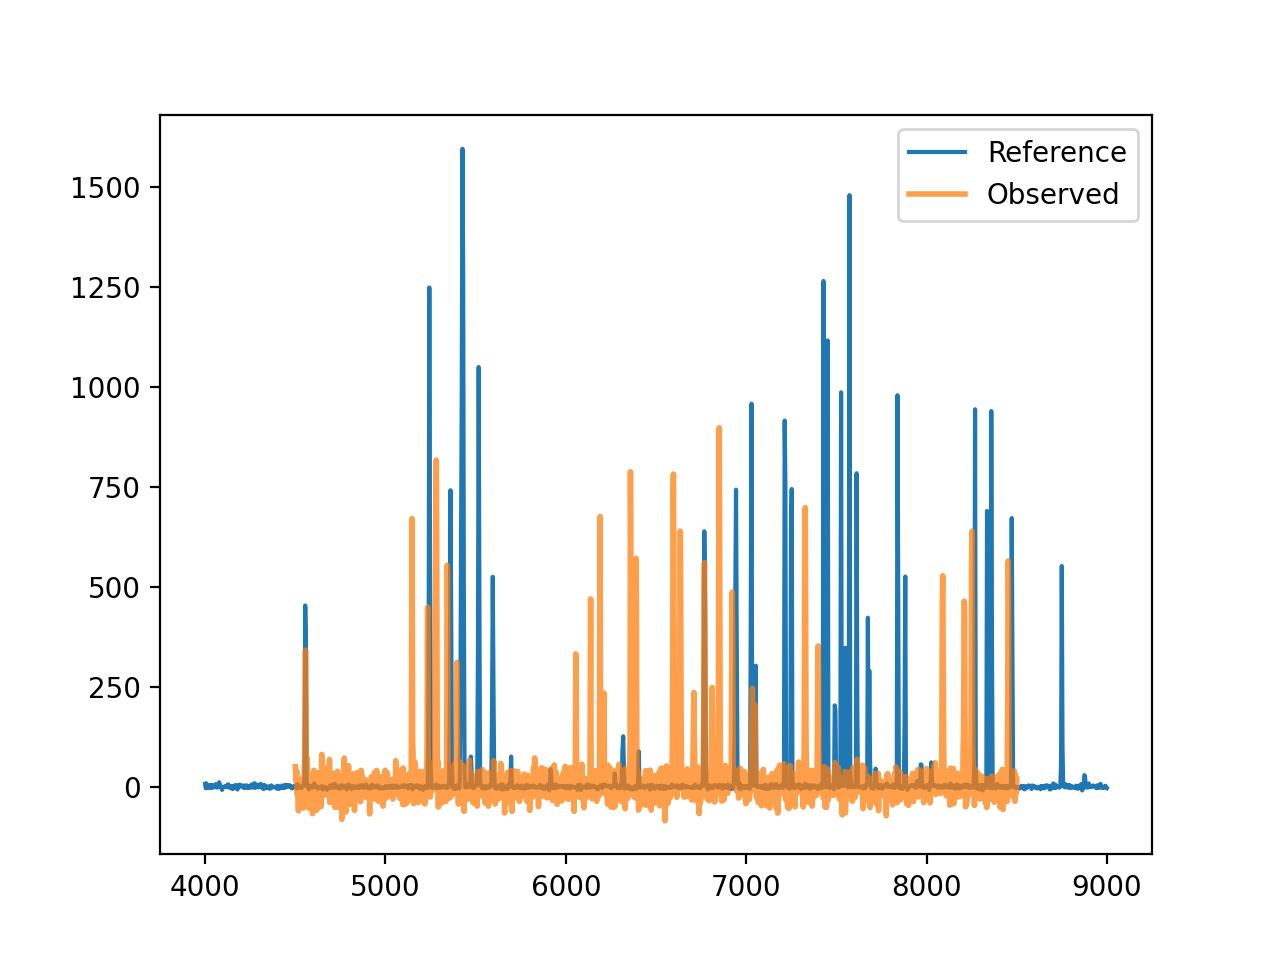

In [2]:
# generate some fake arc lamp spectra 

wav = np.append(np.logspace(np.log10(4500), np.log10(7000), 1024), 
               np.linspace(7001, 8500, 1024))

pix = np.arange(len(wav))

Nlines = 30
lines = np.random.random(size=Nlines)*4000 + 4500
peaks = np.random.random(size=Nlines) * 1000

flux = np.zeros(2048)
for k in range(Nlines):
    flux = flux + _gaus(wav, peaks[k], 0, lines[k], 2)

# do transformation for ref spectrum
flux2 = np.interp(np.linspace(4500,8500,2048), wav, flux)

# add some gaussian noise to the observation
flux = flux+np.random.normal(loc=0, scale=25, size=2048)

# Here's the TRUTH you would have on hand, either from observatory or a previous reduction
# it spans a larger wavelength range, and has a few extra random lines in it
wav_ref = np.linspace(4000,9000,1280)
flux_ref = np.interp(wav_ref, wav, flux2) * 2  # down-sample the library spectrum
flux_ref = flux_ref + np.random.normal(loc=0, scale=3, size=len(flux_ref))

# put some extra small lines in
elines = 10
for k in range(elines):
    flux_ref = flux_ref + _gaus(wav_ref, np.random.random(size=1)*100, 0, 
                        np.random.random(size=1)*5000+4000, 2)
# put at least 1 major line outside the observed spectrum too
flux_ref = flux_ref + _gaus(wav_ref, 555, 0, 8750, 2)


plt.plot(wav_ref, flux_ref, label='Reference')
# the observation is (pix, flux)
# and if you just linearly shift/scaled the trace into the wavelegnth range:
plt.plot(np.linspace(4500,8500,2048), flux, lw=2, alpha=0.75, label='Observed')
plt.legend()

ref = Spectrum1D(spectral_axis=wav_ref*u.AA, flux=flux_ref*u.adu/u.s)
arc = Spectrum1D(spectral_axis=np.arange(len(flux))*u.pixel, flux=flux*u.adu/u.s)

<IPython.core.display.Javascript object>


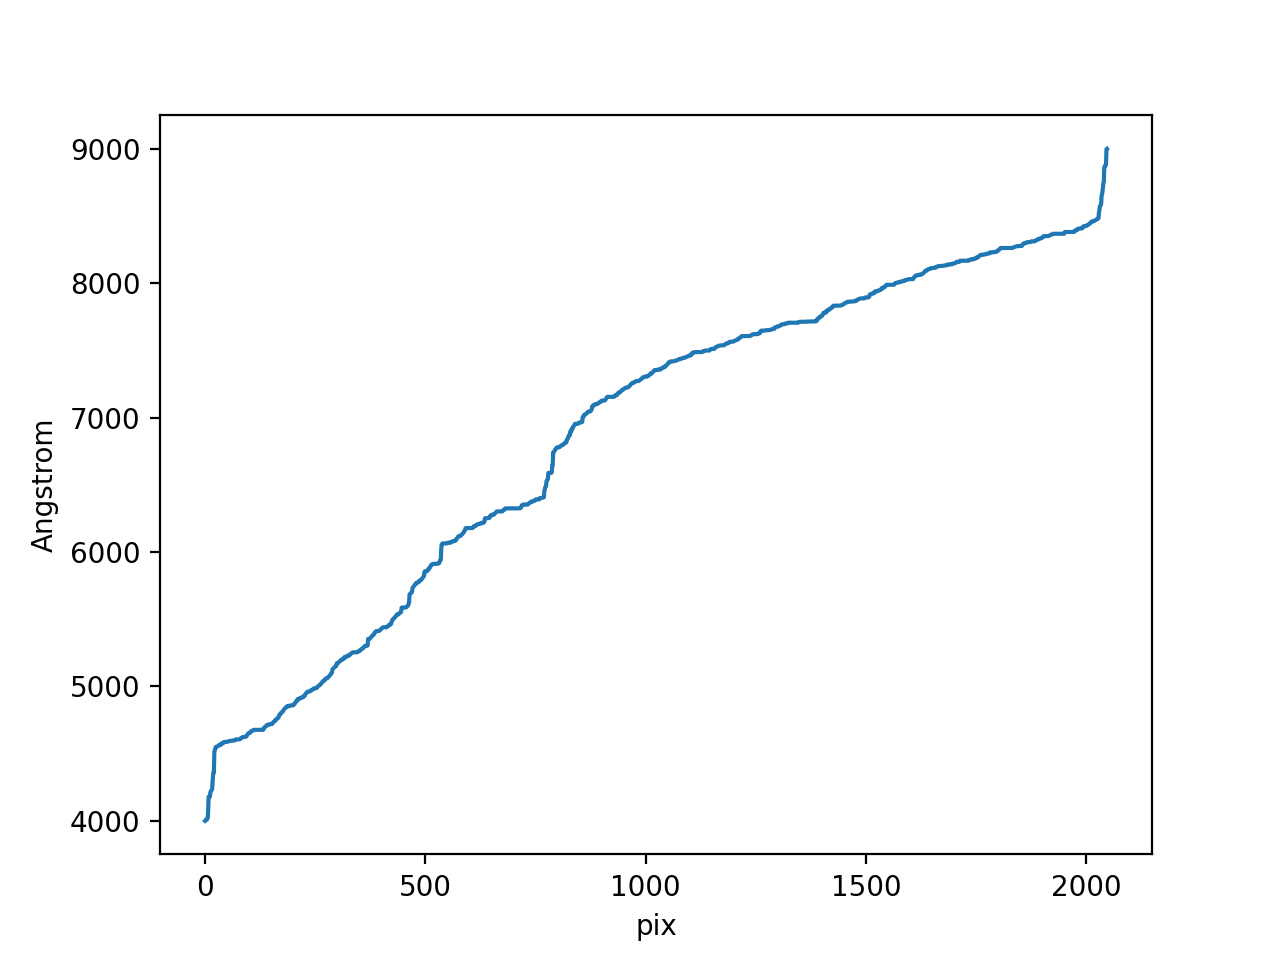

In [3]:
arc2 = kosmos.dtwalign(arc, ref, upsample=True, display=True)


<IPython.core.display.Javascript object>


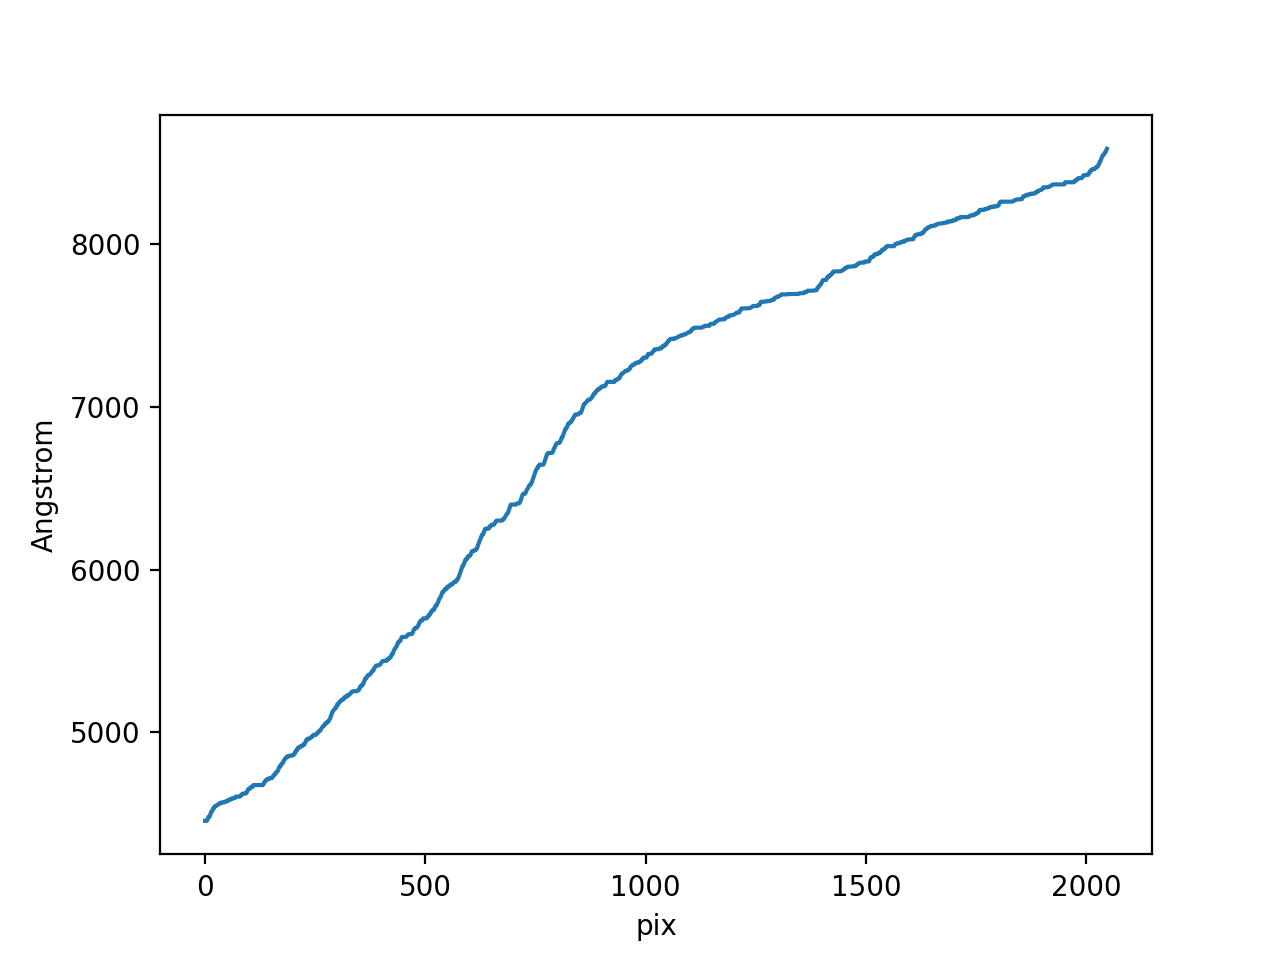

In [5]:
arc3 = kosmos.dtwalign(arc, ref, upsample=True, display=True, 
                       step_pattern='asymmetric', open_begin=True, open_end=True)


<IPython.core.display.Javascript object>


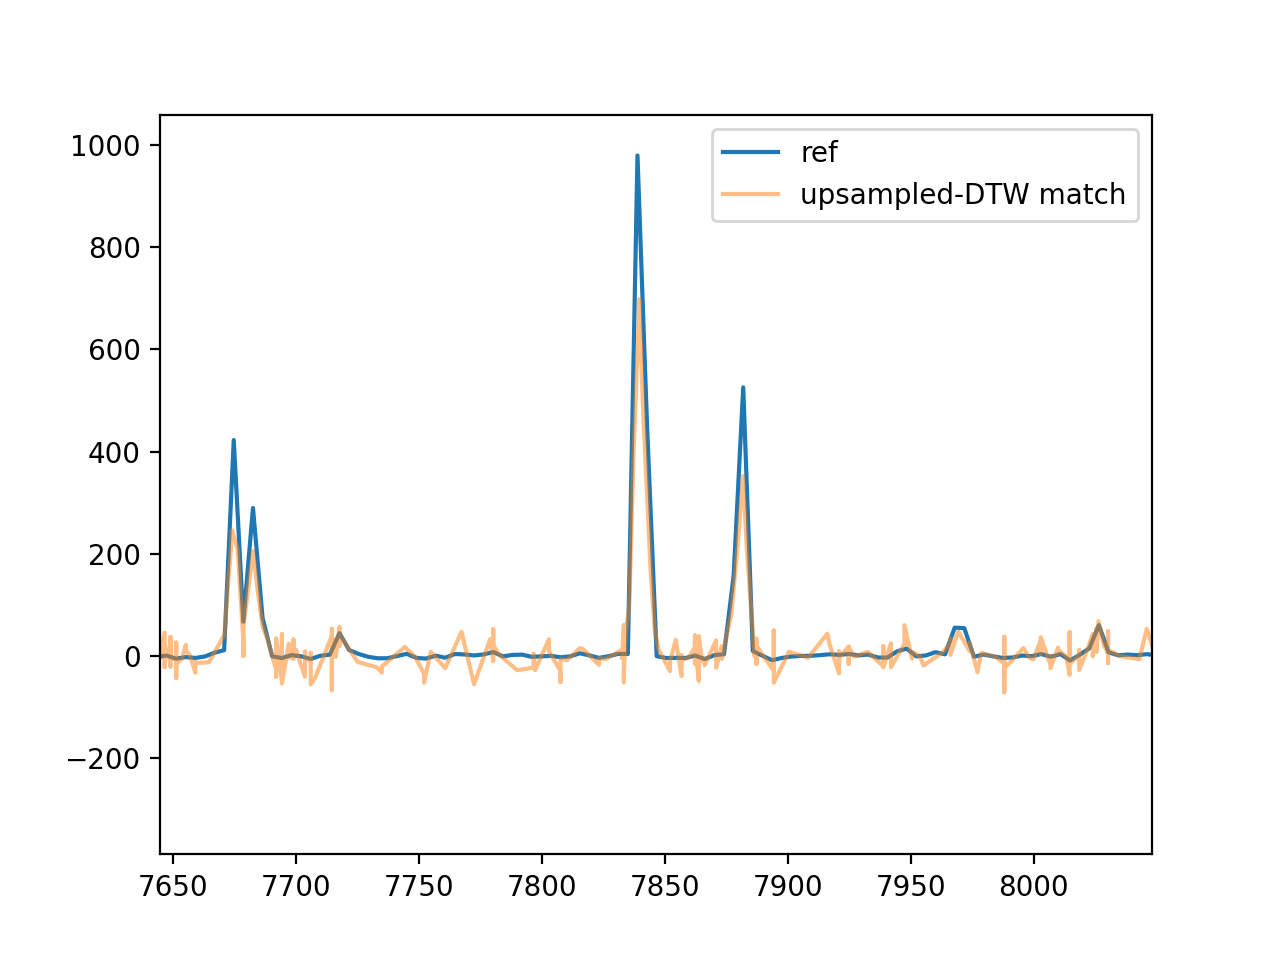

In [7]:
plt.plot(ref.spectral_axis.value, ref.flux.value, label='ref')
# plt.plot(arc2.spectral_axis.value, arc2.flux.value, label='symmetric1', alpha=0.5)
plt.plot(arc3.spectral_axis.value, arc3.flux.value, label='upsampled-DTW match', alpha=0.5)
plt.legend()

In [ ]:
# i think its time to try working on real data to understand how bent/non-linear this needs to realistically be!